# Data Science análises para saúde e medicina
## Módulo 1
### Dados e visualizações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np 
import seaborn as sns

In [2]:
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmados_por_pais = confirmados.groupby('Country/Region').sum()
confirmados_por_pais.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Gambia,13.4432,-15.3101,0,0,0,0,0,0,0,0,...,5968,5978,5978,5978,5990,5990,5990,5990,5993,5993
Pakistan,30.3753,69.3451,0,0,0,0,0,0,0,0,...,903599,905852,908576,911302,913784,916239,918936,921053,922824,924667
Burundi,-3.3731,29.9189,0,0,0,0,0,0,0,0,...,4494,4546,4568,4592,4650,4669,4715,4754,4790,4803
Lebanon,33.8547,35.8623,0,0,0,0,0,0,0,0,...,538518,538668,538991,539271,539590,539888,540132,540277,540388,540630
Micronesia,7.4256,150.5508,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
China,1085.2923,3688.9377,548,643,920,1406,2075,2877,5509,6087,...,102873,102890,102905,102925,102932,102948,102960,102987,103014,103045
Lithuania,55.1694,23.8813,0,0,0,0,0,0,0,0,...,270849,271130,271682,272231,272826,273346,273866,274199,274383,274776
Haiti,18.9712,-72.2852,0,0,0,0,0,0,0,0,...,13735,13906,13906,14037,14037,14037,14128,14258,14351,14565
Taiwan*,23.7000,121.0000,1,1,3,3,4,5,8,8,...,4322,4917,5456,6091,6761,7315,7806,8160,8511,8842


<AxesSubplot:title={'center':'Casos confirmados no Brasil '}, xlabel='Data', ylabel='Número de casos confirmados'>

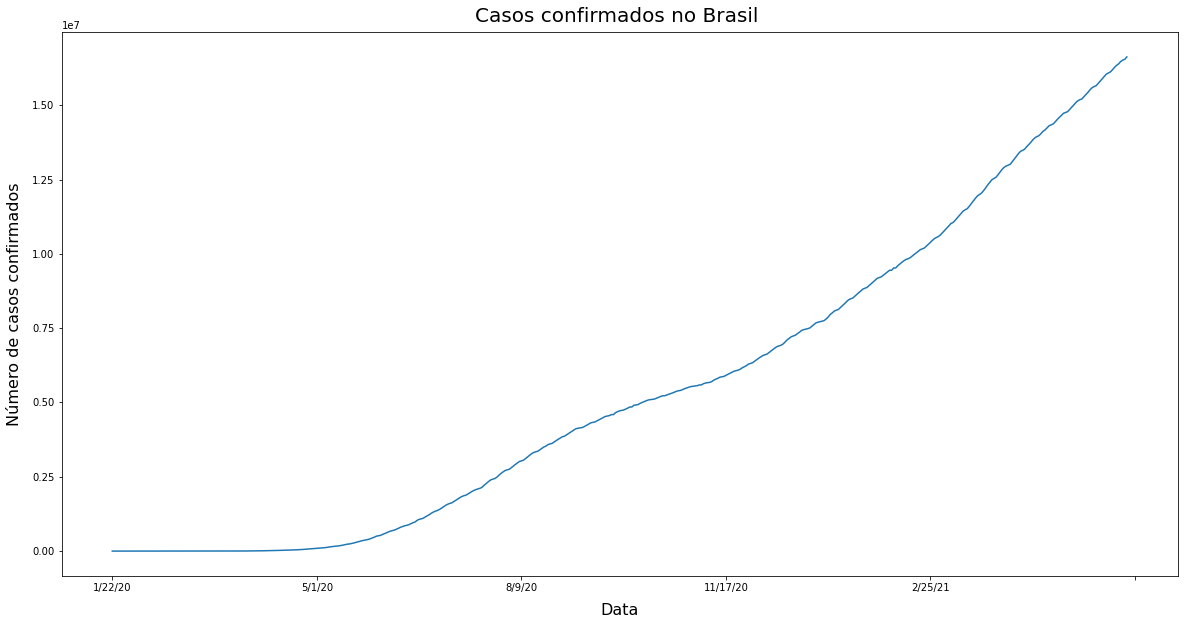

In [4]:
brasil = confirmados_por_pais.loc['Brazil'][2:]
plt.figure(figsize=(20,10))

plt.title('Casos confirmados no Brasil ', fontsize = 20, pad = 10)
plt.xlabel('Data', fontsize = 16, labelpad = 10)
plt.ylabel('Número de casos confirmados', fontsize = 16, labelpad = 10)
plt.tick_params()
plt.grid(True)

brasil.plot()

## Módulo 2 
### Timeseries, barras, tortas 

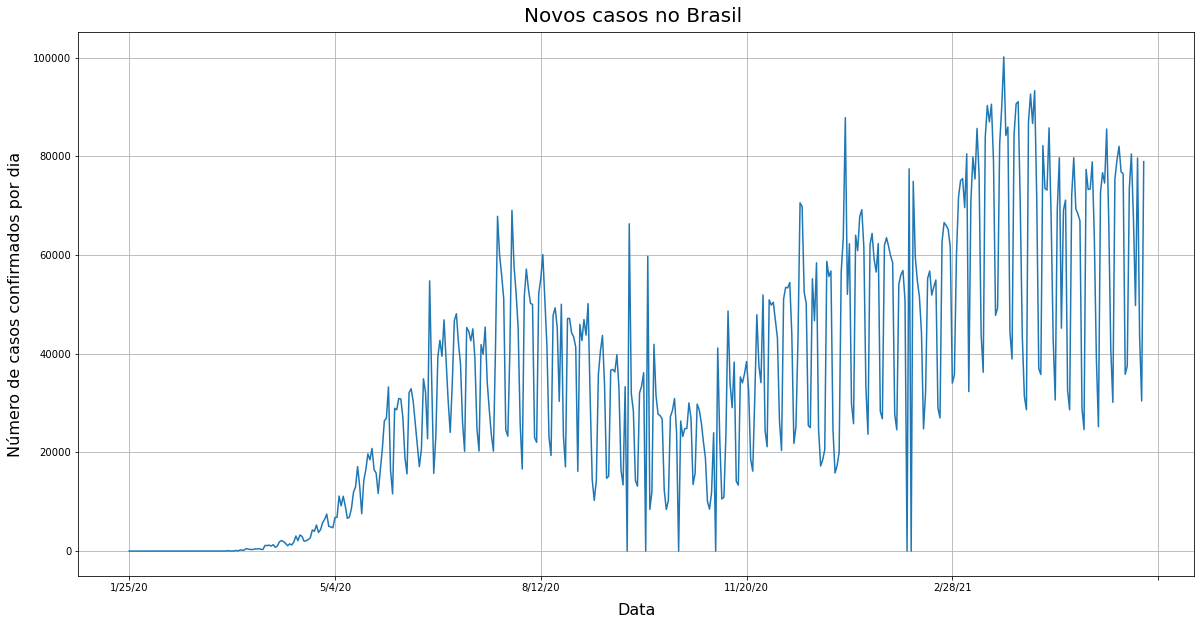

In [5]:
novos_casos_brasil = brasil[2:].diff().dropna()
plt.figure(figsize=(20,10))

novos_casos_brasil.plot()
plt.title('Novos casos no Brasil ', fontsize = 20, pad = 10)
plt.xlabel('Data', fontsize = 16, labelpad = 10)
plt.ylabel('Número de casos confirmados por dia', fontsize = 16, labelpad = 10)
plt.grid(True)

In [6]:
ultimo_dia = '5/31/21'
confirmados_por_pais[ultimo_dia]

Country/Region
Afghanistan            71838
Albania               132315
Algeria               128913
Andorra                13727
Angola                 34551
                       ...  
Vietnam                 7432
West Bank and Gaza    308350
Yemen                   6742
Zambia                 95263
Zimbabwe               38961
Name: 5/31/21, Length: 193, dtype: int64

<AxesSubplot:title={'center':'Número de casos no dia 31/05/21'}, xlabel='Country/Region'>

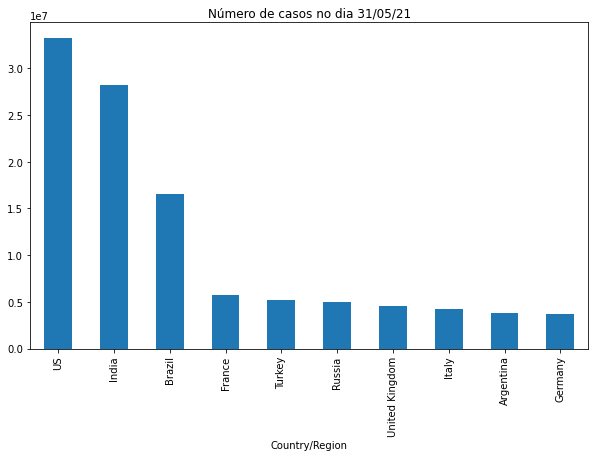

In [7]:
# Gráfico de barra
dados = confirmados_por_pais[ultimo_dia].sort_values(ascending = False)[0:10]
plt.figure(figsize = (10,6))
plt.title('Número de casos no dia 31/05/21')
plt.ScalarFormatter.set_scientific = False

dados.plot(kind = 'bar')

## Módulo 3 
### Fonte de dados e letalidade

In [8]:
confirmados.groupby('Country/Region').sum()[ultimo_dia]

Country/Region
Afghanistan            71838
Albania               132315
Algeria               128913
Andorra                13727
Angola                 34551
                       ...  
Vietnam                 7432
West Bank and Gaza    308350
Yemen                   6742
Zambia                 95263
Zimbabwe               38961
Name: 5/31/21, Length: 193, dtype: int64

In [9]:
# Função de agrupamento
def ultimos_por_pais(data):
    return data.groupby('Country/Region').sum()[ultimo_dia]
def agrupados(data):
    return data.groupby('Country/Region').sum()[2:]

In [10]:
informacoes = [ultimos_por_pais(confirmados), ultimos_por_pais(mortes), ultimos_por_pais(recuperados)]
combinados = pd.concat(informacoes, axis = 1)
combinados.columns = ['Confirmados', 'Mortes', 'Recuperados']
combinados

,Confirmados,Mortes,Recuperados
Country/Region,,,
Afghanistan,71838,2944,57629
Albania,132315,2451,129431
Algeria,128913,3472,89839
Andorra,13727,127,13458
Angola,34551,766,28079
...,...,...,...
Vietnam,7432,47,3029
West Bank and Gaza,308350,3497,300776
Yemen,6742,1321,3445


In [11]:
# Cálculo da taxa de letalidade
# Casos letais / casos confirmados * 100
# Função para dados geral - a soma combina os dados
def taxa_letalidade(dados_combinados):
    soma = dados_combinados.sum()
    letalidade = (soma['Mortes']/ soma['Confirmados']) * 100
    return print('Taxa de letalidade geral: ' + '%0.2f' % letalidade + ' %')

# Função por país
def letalidade_por_pais(dados_combinados):
    letalidade_por_pais = (dados_combinados['Mortes'] / dados_combinados['Confirmados']) * 100
    return letalidade_por_pais.round(2)

# Função de casos
def letalidade_casos_novos(dados_combinados):
    letalidade_casos_novos = (dados_combinados['Mortes']/(dados_combinados['Recuperados'] + dados_combinados['Mortes'])) * 100
    return letalidade_casos_novos

In [12]:
taxa_letalidade(combinados) 

Taxa de letalidade geral: 2.08 %


In [13]:
letalidade_por_pais(combinados)

Country/Region
Afghanistan            4.10
Albania                1.85
Algeria                2.69
Andorra                0.93
Angola                 2.22
                      ...  
Vietnam                0.63
West Bank and Gaza     1.13
Yemen                 19.59
Zambia                 1.34
Zimbabwe               4.09
Length: 193, dtype: float64

In [14]:
letalidade_casos_novos(combinados)

Country/Region
Afghanistan            4.860251
Albania                1.858480
Algeria                3.720890
Andorra                0.934855
Angola                 2.655573
                        ...    
Vietnam                1.527958
West Bank and Gaza     1.149297
Yemen                 27.717163
Zambia                 1.373918
Zimbabwe               4.174086
Length: 193, dtype: float64

In [15]:
letalidade_por_pais(combinados).sort_values(ascending = False)

Country/Region
Vanuatu                  25.00
MS Zaandam               22.22
Yemen                    19.59
Mexico                    9.26
Sudan                     7.41
                         ...  
Marshall Islands          0.00
Micronesia                0.00
Saint Kitts and Nevis     0.00
Samoa                     0.00
Solomon Islands           0.00
Length: 193, dtype: float64

## Módulo 4
### Histogramas e resumindo informações

In [16]:
informacoes = [ultimos_por_pais(confirmados), ultimos_por_pais(mortes), ultimos_por_pais(recuperados),letalidade_por_pais(combinados), letalidade_casos_novos(combinados)]
combinados = pd.concat(informacoes, axis = 1)
combinados.columns = ['Confirmados', 'Mortes', 'Recuperados', 'Letalidade por País', ' Letalidade Casos Novos']
combinados

,Confirmados,Mortes,Recuperados,Letalidade por País,Letalidade Casos Novos
Country/Region,,,,,
Afghanistan,71838,2944,57629,4.10,4.860251
Albania,132315,2451,129431,1.85,1.858480
Algeria,128913,3472,89839,2.69,3.720890
Andorra,13727,127,13458,0.93,0.934855
Angola,34551,766,28079,2.22,2.655573
...,...,...,...,...,...
Vietnam,7432,47,3029,0.63,1.527958
West Bank and Gaza,308350,3497,300776,1.13,1.149297
Yemen,6742,1321,3445,19.59,27.717163


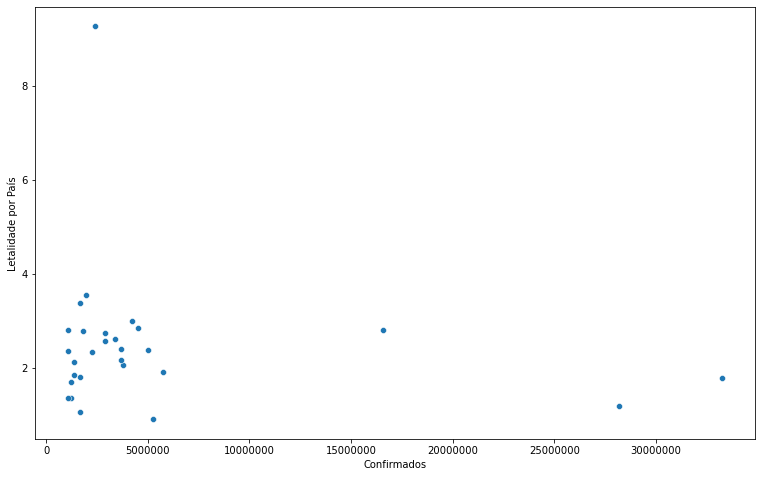

In [17]:
fig = plt.figure(figsize = (10,6))
eixo = fig.add_axes([0, 0, 1, 1])
dados = combinados.query('Confirmados > 1000000')
eixo = sns.scatterplot(data = dados, x = 'Confirmados', y = 'Letalidade por País')
eixo.xaxis.set_major_formatter(tck.FormatStrFormatter('%.0f'))

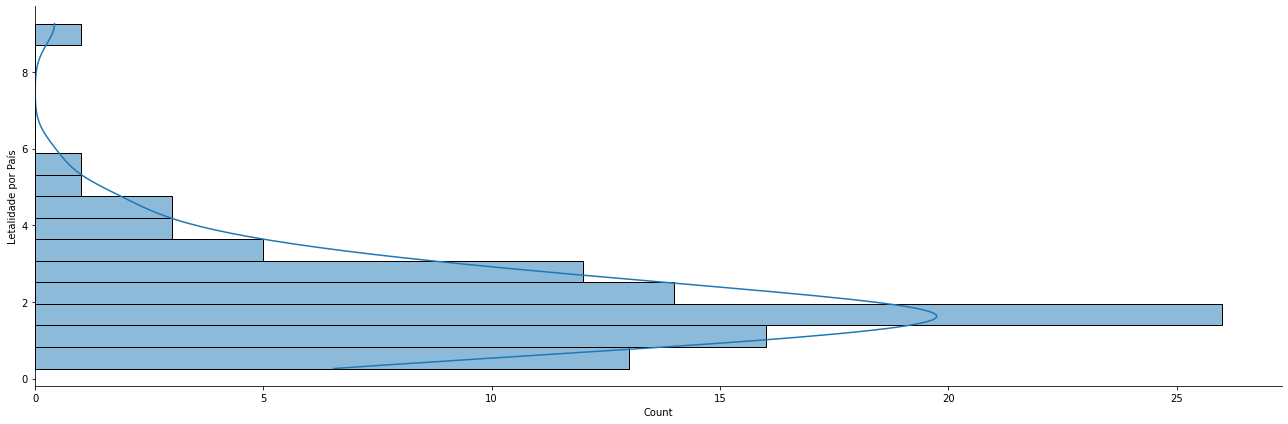

In [18]:
eixo = sns.displot(y = combinados.query('Confirmados > 100000')['Letalidade por País'], kde = True, height = 6, aspect = 3)